### Assignment1

Remember -> submission using itslearning, both notebook and github repo *deadline on 22.11.2021*

#### Task 1 (3 points):

Regression $\to$ Superconductivity Data Set

The goal here is to predict the critical temperature based on the features extracted.

https://archive.ics.uci.edu/ml/datasets/Superconductivty+Data

* Fit two regression models to predict the critical temperature. Report the score with the default parameters of each model.
* Perform a simple manual optimization for one of the default parameters (at least 5 different values) and plot the new obtained score as a function of the chosen parameter. Plot the coefficient magnitudes for the best model. 

In [105]:

# First upgrade the environment.
# https://pypi.org/project/yfinance
import pip
from subprocess import run
# add what you will need
modules =[
     'pandas_datareader',
     'mglearn',
    'pandas_market_calendars',
    'plotly', 
    'numpy',
    'sklearn',
    'pandas',
    'xlrd'
]
proc = run(f'pip install {" ".join(modules)} --upgrade --no-input', 
       shell=True, 
       text=True, 
       capture_output=True, 
       timeout=120) #a couple of minutes
print(proc.stderr)

In [106]:
## Run this if you need to check your modules
import pip
from pip._internal.utils.misc import get_installed_distributions
pkgs = ''.join(str(get_installed_distributions(local_only=True)))

with open("modules.txt", "a") as file_object:
 for p in (get_installed_distributions(local_only=True)):
     file_object.write(str(p)+'\n')
     print(str(p))
file_object.close()

zipp 3.1.0
xlrd 2.0.1
xgboost 1.0.2
wrapt 1.12.1
widgetsnbextension 3.5.1
wheel 0.34.2
Werkzeug 1.0.1
webencodings 0.5.1
wcwidth 0.1.8
urllib3 1.25.7
traitlets 4.3.3
tqdm 4.43.0
tornado 6.0.4
torchvision 0.5.0+cpu
torch 1.4.0+cpu
toolz 0.11.1
Theano 1.0.4
testpath 0.4.4
terminado 0.8.3
termcolor 1.1.0
tensorflow 2.0.0
tensorflow-estimator 2.0.1
tensorboard 2.0.2
tenacity 8.0.1
SQLAlchemy 1.3.15
sklearn 0.0
six 1.14.0
setuptools 46.1.3
Send2Trash 1.5.0
seaborn 0.10.0
scipy 1.4.1
scikit-learn 0.22.2.post1
scikit-image 0.16.2
ruamel.yaml 0.16.6
ruamel.yaml.clib 0.2.0
ruamel-yaml 0.15.80
rsa 4.0
requests 2.23.0
requests-oauthlib 1.3.0
pyzmq 19.0.0
PyYAML 5.3.1
PyWavelets 1.1.1
pytz 2019.3
python-json-logger 0.1.11
python-editor 1.0.4
python-dateutil 2.8.1
PySocks 1.7.1
pyrsistent 0.15.7
pyparsing 2.4.7
pyOpenSSL 19.1.0
pyluach 1.3.0
PyJWT 1.7.1
Pygments 2.6.1
pydot 1.4.1
pydot-ng 2.0.0
pycurl 7.43.0.5
pycparser 2.20
pycosat 0.6.3
pyasn1 0.4.8
pyasn1-modules 0.2.8
ptyprocess 0.6.0
protobuf 

In [87]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mglearn

from matplotlib import rc
font = {'family' : 'monospace', 'weight' : 'bold', 'size'   : 25}
rc('font', **font) 

plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams['lines.linewidth'] = 5.0
plt.rcParams['lines.markersize'] = 15.0

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 

#plt.rcParams.keys()

dowload zip data

In [95]:
#dowload zip data
import urllib.request
from io import StringIO, BytesIO, TextIOWrapper
from zipfile import ZipFile

condact_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00464/'
data_url = 'superconduct.zip'
resp = urllib.request.urlopen(condact_url +  urllib.request.quote(data_url))

zipfile = ZipFile(BytesIO(resp.read()))
data_train = TextIOWrapper(zipfile.open('train.csv'), encoding='utf-8')
data_unique_m = TextIOWrapper(zipfile.open('unique_m.csv'), encoding='utf-8')

df_train = pd.read_csv(data_train)
df_unique_m = pd.read_csv(data_unique_m)

In [96]:
df_train.describe()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
count,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,...,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000
mean,4.115224,87.557631,72.988310,71.290627,58.539916,1.165608,1.063884,115.601251,33.225218,44.391893,...,3.153127,3.056536,3.055885,1.295682,1.052841,2.041010,1.483007,0.839342,0.673987,34.421219
std,1.439295,29.676497,33.490406,31.030272,36.651067,0.364930,0.401423,54.626887,26.967752,20.035430,...,1.191249,1.046257,1.174815,0.393155,0.380291,1.242345,0.978176,0.484676,0.455580,34.254362
min,1.000000,6.941000,6.423452,5.320573,1.960849,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000210
25%,3.000000,72.458076,52.143839,58.041225,35.248990,0.966676,0.775363,78.512902,16.824174,32.890369,...,2.116732,2.279705,2.091251,1.060857,0.775678,1.000000,0.921454,0.451754,0.306892,5.365000
50%,4.000000,84.922750,60.696571,66.361592,39.918385,1.199541,1.146783,122.906070,26.636008,45.123500,...,2.618182,2.615321,2.434057,1.368922,1.166532,2.000000,1.063077,0.800000,0.500000,20.000000
75%,5.000000,100.404410,86.103540,78.116681,73.113234,1.444537,1.359418,154.119320,38.356908,59.322812,...,4.026201,3.727919,3.914868,1.589027,1.330801,3.000000,1.918400,1.200000,1.020436,63.000000
max,9.000000,208.980400,208.980400,208.980400,208.980400,1.983797,1.958203,207.972460,205.589910,101.019700,...,7.000000,7.000000,7.000000,2.141963,1.949739,6.000000,6.992200,3.000000,3.000000,185.000000


In [97]:
#df_unique_m

In [98]:
#Convert into numpy arrays
X = df_train.iloc[:,:-1].values #features
y_reg = df_train.iloc[:,-1].values #regression (critical_temp)

#split train - test set
X_train, X_test, y_train,y_test = train_test_split(X, y_reg,random_state=42)

In [99]:
X_train.shape, y_train.shape

((15947, 81), (15947,))

 Task1- A 
 
 - Fit two regression models to predict the critical temperature. Report the score with the default parameters of each model.

Using k-Neighbors for regresstion

In [100]:
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor()#defult n_neighbors= 5
reg.fit(X_train,y_train)
print('prediction of  the critical temperature')
print(reg.predict(X_test))
print("Training score : {:.3f}".format(reg.score(X_train, y_train)))
print("Test score  R^2: {:.5f}".format(reg.score(X_test, y_test)))

prediction of  the critical temperature
[ 9.566 83.12  35.24  ... 24.68  87.46   7.224]
Training score : 0.922
Test score  R^2: 0.87906


Using Ridge regression

In [101]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("Training score : {:.3f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.3f}".format(ridge.score(X_test, y_test)))
#ridge.coef_

Training score : 0.739
Test set score: 0.727


# Note :k-Neighbors model seems better than Ridge regression model at the moment

Task2- B 

- Perform a simple manual optimization for one of the default parameters (at least 5 different values) and plot the new obtained score as a function of the chosen parameter. Plot the coefficient magnitudes for the best model.

Using k-Neighbors for regresstion

In [102]:
def plot_parm(k_Neighbors,test_scores, train_scores):
    plt.plot(k_Neighbors,test_scores, label='testing')
    plt.plot(k_Neighbors,train_scores, label='training')
    plt.ylabel('scores R^2')
    plt.xlabel('k_Neighbors')
    plt.gca().invert_xaxis()
    plt.legend()
    plt.show()

In [103]:
def KN_fun(X_test,y_test,k_nighber):
    test_accuracy = []
    train_accuracy = []
    for n_neighbors in k_nighber:
    # build the model
        reg = KNeighborsRegressor(n_neighbors=n_neighbors)
        reg.fit(X_train, y_train)
        test_accuracy.append(reg.score(X_test, y_test))
        train_accuracy.append(reg.score(X_train, y_train))
    return test_accuracy,train_accuracy

for neighbore =5 test score =0.87906;train score =0.92182
for neighbore =10 test score =0.85658;train score =0.88530
for neighbore =20 test score =0.82644;train score =0.84752
for neighbore =60 test score =0.75098;train score =0.77220
for neighbore =70 test score =0.74045;train score =0.76006
for neighbore =100 test score =0.71433;train score =0.73060


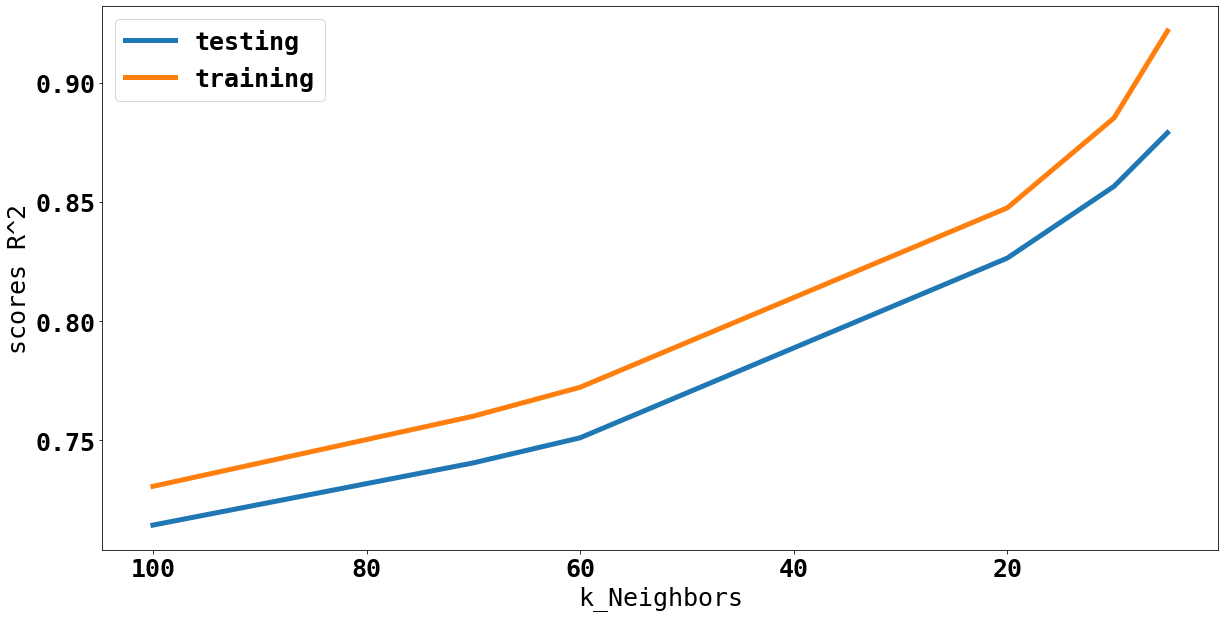

In [104]:
k_Neighbors = [5,10,20,60,70,100]
test_scores = []
train_scores = []
test_scores,train_scores=KN_fun(X_test,y_test, k_Neighbors)
for Kn in range(len(k_Neighbors)):
    print('for neighbore ={:.0f}'.format(k_Neighbors[Kn]) + ' test score ={:.5f}'.format(test_scores[Kn]) +';'
         'train score ={:.5f}'.format(train_scores[Kn]))
plot_parm(k_Neighbors,test_scores, train_scores)

*Note as the K-neighbors increase the score decrease*

Using Ridge regression

In [17]:
def ridge_fun(X_test,y_test,alphas):
    test_accuracy = []
    train_accuracy = []
    for al in alphas:
    # build the model
        ridge = Ridge(al)
        rg=ridge.fit(X_train,y_train)
        test_accuracy.append(rg.score(X_test, y_test))
        train_accuracy.append(rg.score(X_train, y_train))
    return test_accuracy,train_accuracy


for alphas =0.10 test score =0.73974;train score =0.72785
for alphas =0.50 test score =0.73962;train score =0.72757
for alphas =1.00 test score =0.73949;train score =0.72742
for alphas =5.00 test score =0.73850;train score =0.72665
for alphas =1000.00 test score =0.72748;train score =0.71478


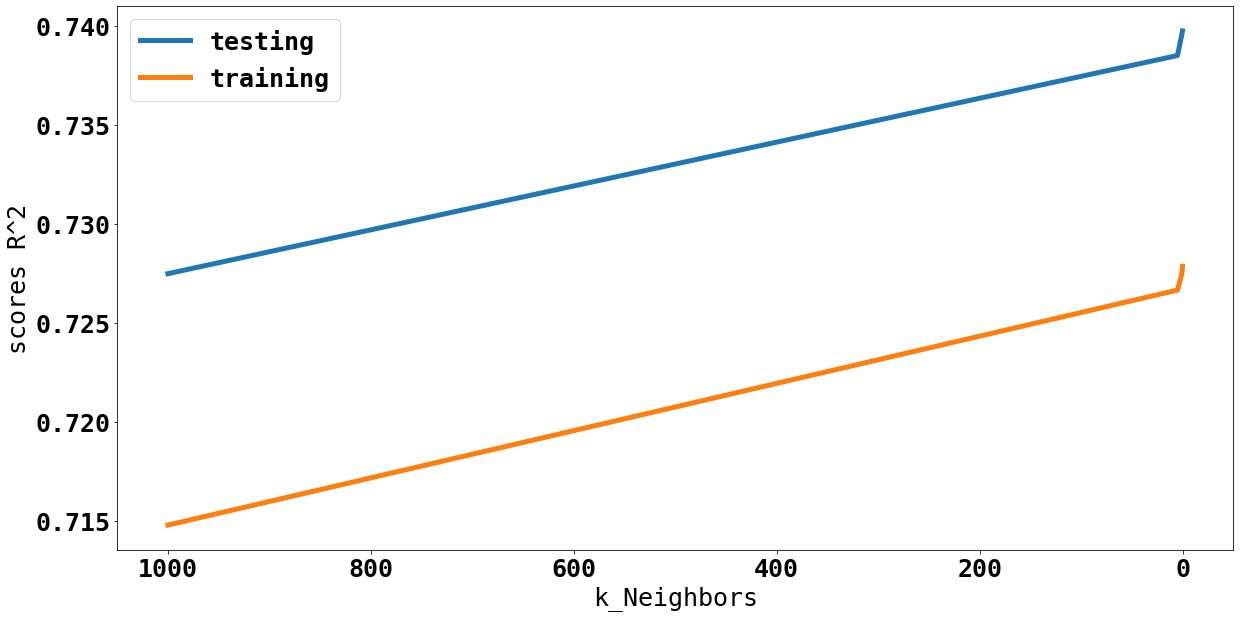

In [18]:
alphas = [0.1, 0.5, 1, 5, 1000]
R_test_scores = []
R_train_scores = []
R_train_scores, R_test_scores=ridge_fun(X_test,y_test, alphas)
for al in range(len(alphas)):
    print('for alphas ={:.02f}'.format(alphas[al]) + ' test score ={:.5f}'.format(R_test_scores[al]) +';'
         'train score ={:.5f}'.format(R_train_scores[al]))
plot_parm(alphas,R_test_scores, R_train_scores)

# Note -  KNeighborsRegressor model is better than Ridge regression 

In [19]:
# Plot the coefficient magnitudes for the best model.
def knn_coeff_plot():
    X, y = mglearn.datasets.make_wave(n_samples=40) # just a dummy dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    fig, axes = plt.subplots(1, 3, figsize=(30, 10))
    line = np.linspace(-3, 3, 1000).reshape(-1, 1)
    for n_neighbors, ax in zip([1, 5, 15], axes):
    # make predictions using 1, 3 or 9 neighbors
        reg = KNeighborsRegressor(n_neighbors=n_neighbors)
        reg.fit(X_train, y_train)
        ax.plot(line, reg.predict(line))
        ax.plot(X_train, y_train, "^", c=mglearn.cm2(0), markersize=8)
        ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
        ax.set_title("{} neighbor(s)\n train score: {:.2f}\n test score: {:.2f}".format(n_neighbors, 
                    reg.score(X_train, y_train),reg.score(X_train, y_train)))
        ax.set_xlabel("Feature")
        ax.set_ylabel("Target")

    axes[0].legend(["Model predictions", "Training data/target","Test data/target"], loc="best")

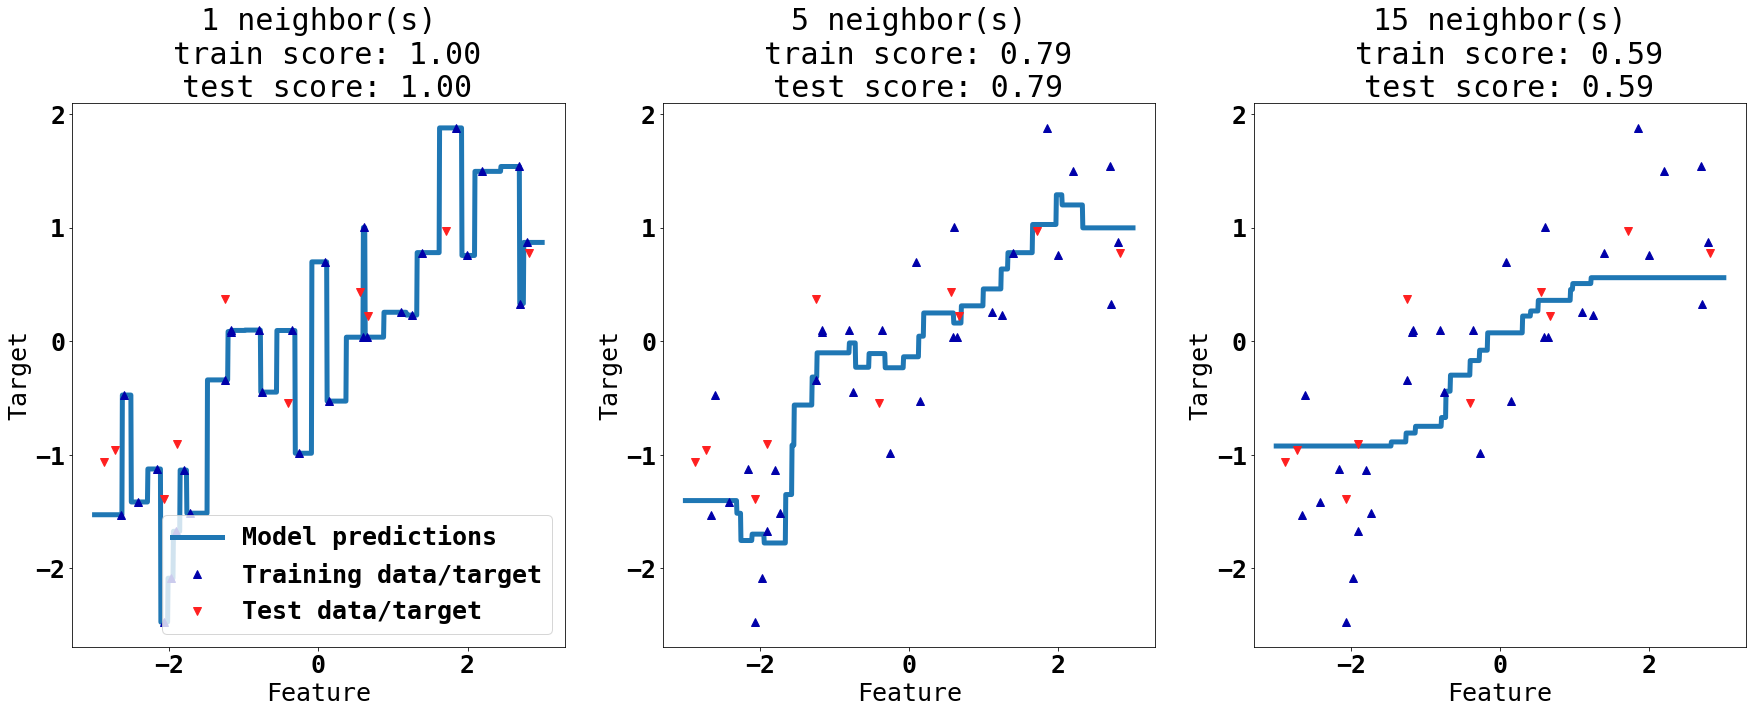

In [20]:
knn_coeff_plot()

#### Task 2 (3 points):

Binary classification $\to$ Default of credit card clients Data Set

The goal here is to predict the default payment next month.

https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

* Fit two binary classification models to predict the client's credit card default. Report accuracy with the default parameters of each model.
* Perform a simple manual optimization for one of the default parameters (at least 5 different values) and plot the new obtained accuracy as a function of the chosen parameter.. Plot the feature importance. 

In [ ]:
#import file from local machine data folder
data = pd.read_excel('https://people.arcada.fi/~atsmegit/data/ML-predctive/default_of_credit_card_clients.xls') #personal page 

In [34]:
#drop ID, is not important
credit_data= data.copy()
credit_data=credit_data.drop(['ID'], axis=1)

In [35]:
#data cleaning
#for consistency and simplicity change  'PAY_0' to 'PAY_1' & 'default payment next month' to 'Default'
credit_data.rename(columns={'PAY_0':'PAY_1', 'default payment next month': 'Default'}, inplace=True)
#credit_data.info()

In [36]:
# EDUCATIN should be in  [1,2,3,4] and there are some 0,5,6 change them to 4
print('EDUCATION ' + str(sorted(credit_data['EDUCATION'].unique())))
edu = (credit_data.EDUCATION == 0) | (credit_data.EDUCATION == 5) | (credit_data.EDUCATION == 6)
credit_data.loc[edu, 'EDUCATION'] = 4
print('EDUCATION ' + str(sorted(credit_data['EDUCATION'].unique())))

EDUCATION [0, 1, 2, 3, 4, 5, 6]
EDUCATION [1, 2, 3, 4]


Task2-A

- Fit two binary classification models to predict the client's credit card default. Report accuracy with the default parameters of each model.

In [37]:
print('Default ' + str(sorted(credit_data['Default'].unique())))

Default [0, 1]


In [38]:
X_credit = credit_data.iloc[:,:-1].values#featurs
y_credit_cls= credit_data.iloc[:,-1].values#target (default)
X_credit_train, X_credit_test, y_credit_cls_train, y_credit_cls_test = train_test_split(X_credit, y_credit_cls, random_state=66)
X_credit_train.shape, y_credit_cls_train.shape


((22500, 23), (22500,))

Using k-Neighbors for regresstion

In [39]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()#default n_neighbors=5
clf.fit(X_credit_train, y_credit_cls_train)
print("Test set accuracy: {:.3f}".format(clf.score(X_credit_train, y_credit_cls_train)))
print("Train set score: {:.3f}".format(clf.score(X_credit_test, y_credit_cls_test)))
pred_KN = clf.predict(X_credit_test)

Test set accuracy: 0.816
Train set score: 0.762


Using LogisticRegression

In [40]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression().fit(X_credit_train, y_credit_cls_train)#defoult L1
pred_KN = logreg.predict(X_credit_test)
print("Training set score: {:.5f}".format(logreg.score(X_credit_train, y_credit_cls_train)))
print("Test set score: {:.5f}".format(logreg.score(X_credit_test, y_credit_cls_test)))

Training set score: 0.77884
Test set score: 0.77880


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Using Gradient Boosting classifier

In [41]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier()#default learning_rate=0.1
gbrt.fit(X_credit_train, y_credit_cls_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_credit_train, y_credit_cls_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_credit_test, y_credit_cls_test)))

Accuracy on training set: 0.828
Accuracy on test set: 0.816


In [42]:
print("Feature importances:\n{}".format(gbrt.feature_importances_))

Feature importances:
[0.02602335 0.00211374 0.00637946 0.00416282 0.00472402 0.64579493
 0.06825397 0.02709639 0.01907356 0.01425846 0.02462817 0.03365029
 0.00858558 0.00731553 0.0093588  0.00614715 0.00867291 0.01544879
 0.01884869 0.02174389 0.00969475 0.00813778 0.00988696]


Task2- B

- Perform a simple manual optimization for one of the default parameters (at least 5 different values) and plot the new obtained accuracy as a function of the chosen parameter.. Plot the feature importance.

Using Gradient Boosting classifier

In [43]:
def GT_fun(X_credit_test,y_credit_cls_test,learning_rate):
    test_accuracy = []
    train_accuracy = []
    for learning_rate in learning_rate:
    # build the model
        GTreg = GradientBoostingClassifier(learning_rate= learning_rate)
        GTreg.fit(X_credit_train, y_credit_cls_train)
        test_accuracy.append(GTreg.score(X_credit_test, y_credit_cls_test))
        train_accuracy.append(GTreg.score(X_credit_train, y_credit_cls_train))
    return test_accuracy,train_accuracy

In [44]:
learning_rate = [0.1,0.01,0.001,0.0001,0.00001]
GT_test_scores = []
GT_train_scores = []
GT_test_scores, GT_train_scores=GT_fun(X_credit_test,y_credit_cls_test, learning_rate)
for Gt in range(len(learning_rate)):
    print('for learning_rate ={:.5f}'.format(learning_rate[Gt]) + ' test score ={:.3f}'.format(GT_test_scores[Gt]) +';'
         'train score ={:.3f}'.format(GT_train_scores[Gt]))
    #print( 'train score ={:.5f}'.format(train_scores[Kn]))

for learning_rate =0.10000 test score =0.816;train score =0.828
for learning_rate =0.01000 test score =0.815;train score =0.823
for learning_rate =0.00100 test score =0.779;train score =0.779
for learning_rate =0.00010 test score =0.779;train score =0.779
for learning_rate =0.00001 test score =0.779;train score =0.779


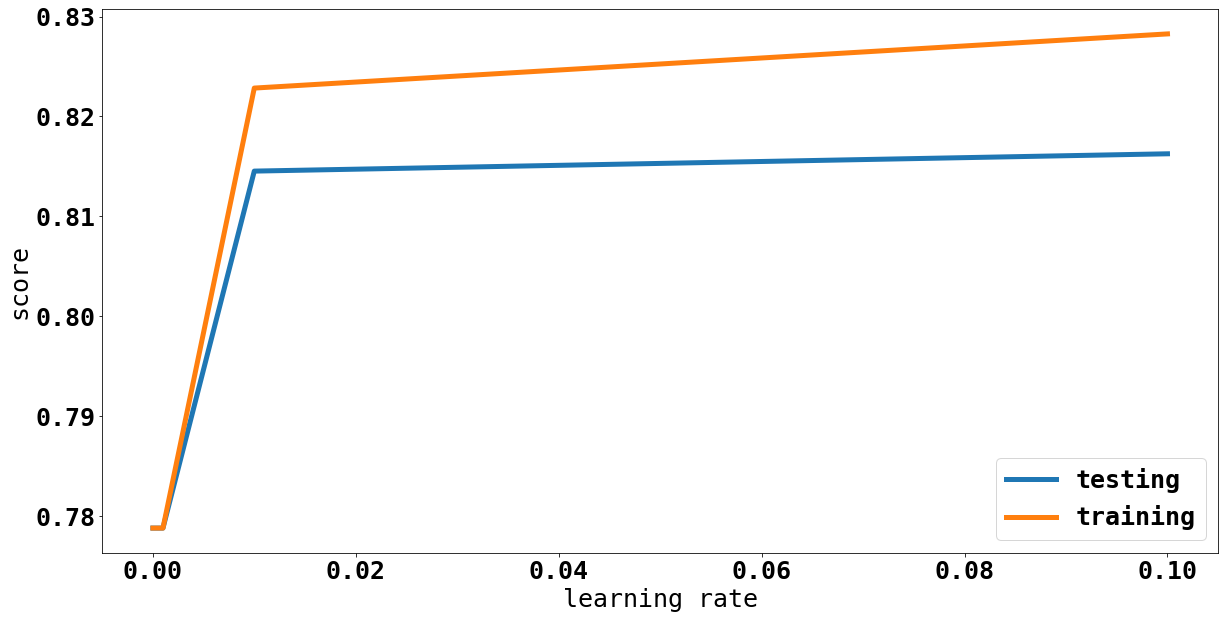

In [45]:
plt.plot(learning_rate, GT_test_scores, label= 'testing' )
plt.plot(learning_rate, GT_train_scores, label= 'training' )
plt.xlabel('learning rate')
plt.ylabel('score')
plt.legend()
plt.show()

Note- as the learning rate increase score decrease(inverse relation)

ploting features importance

In [46]:
X_credit_name = credit_data.iloc[:,:-1].columns#column name
#list(df_train.columns)#list database columns
print(X_credit_name)

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')


In [47]:
def plot_feature_importances(model):#feature importances
    n_features = len(X_credit_name)
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_credit_name)
    plt.title('Feature importance ')
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

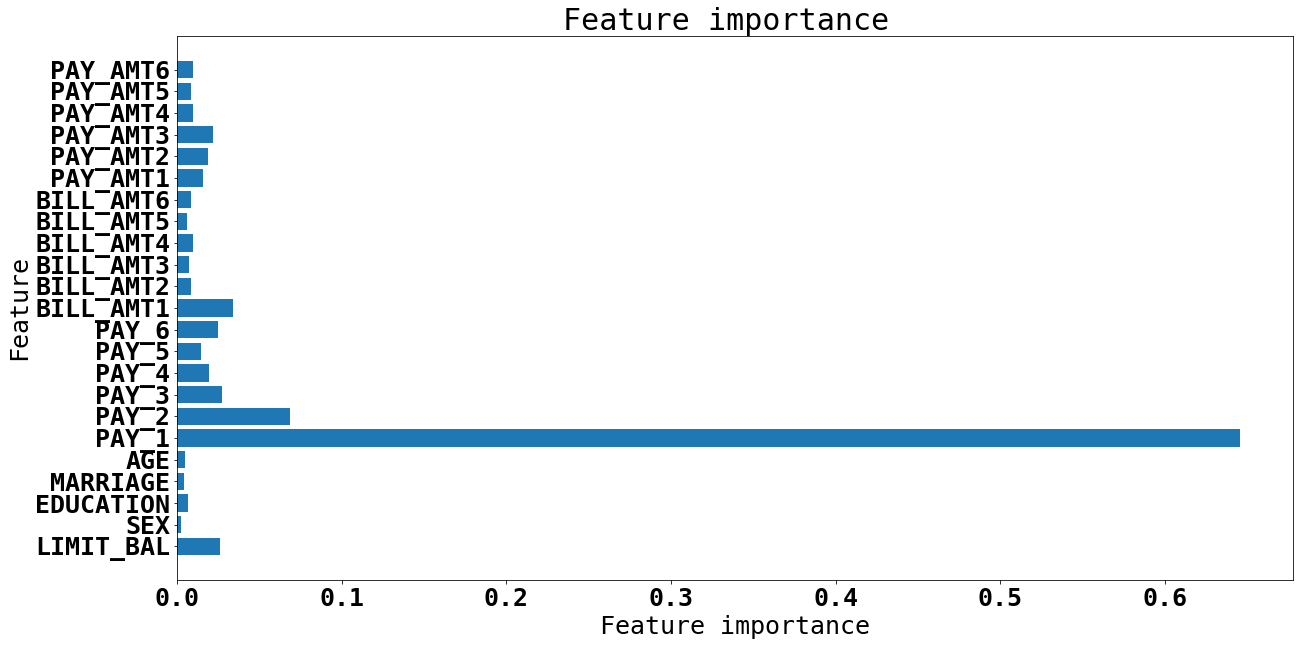

In [48]:
plot_feature_importances(gbrt)

# PAY_1: Repayment status in September, 2005 (most recent month), is the most significant feature indicator for Default.

#### Task 3 (9 points): 

Multiclass & binary classification $\to$ Drug consumption (quantified) Data Set

https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29

Data Set Information:

Database contains records for 1885 respondents. For each respondent 12 attributes are known: Personality measurements which include NEO-FFI-R (neuroticism, extraversion, openness to experience, agreeableness, and conscientiousness), BIS-11 (impulsivity), and ImpSS (sensation seeking), level of education, age, gender, country of residence and ethnicity. All input attributes are originally categorical and are quantified. After quantification values of all input features can be considered as real-valued. In addition, participants were questioned concerning their use of 18 legal and illegal drugs (alcohol, amphetamines, amyl nitrite, benzodiazepine, cannabis, chocolate, cocaine, caffeine, crack, ecstasy, heroin, ketamine, legal highs, LSD, methadone, mushrooms, nicotine and volatile substance abuse and one fictitious drug (Semeron) which was introduced to identify over-claimers. For each drug they have to select one of the answers: never used the drug, used it over a decade ago, or in the last decade, year, month, week, or day.

Database contains 18 classification problems. Each of independent label variables contains seven classes: "Never Used", "Used over a Decade Ago", "Used in Last Decade", "Used in Last Year", "Used in Last Month", "Used in Last Week", and "Used in Last Day".

* Fit two multiclass classification models to predict two selected features out of 18. Use numerical values to represent each class. Report accuracy with the default parameters of each model.
* Perform a simple manual optimization for one of the default parameters (at least 5 different values) for one of the previous models. Plot the new obtained accuracy as a function of the chosen parameter. 
* Fit one multiclass classification model for all the rest 16 features. Comment on the accuracy of predicting each feature, for all the seven classes. 
* Run one binary classification model for 3 features out of 18. Test the performance of the model by choosing as:
 - one class (class 0) the variable "Used in Last Decade" and the remaining variables for the other class (class 1).
 - one class (class 0) the variables "Used in Last Decade" and "Used in Last Year" and the remaining variables for the other class (class 1).
 - one class (class 0) the variables "Used in Last Decade", "Used in Last Year", "Used in Last Month" and the remaining variables for the other class (class 1).
 
 Comment your results, and point which selection of classes have better accuracy.

Task3- A 

- Fit two multiclass classification models to predict two selected features out of 18. Use numerical values to represent each class. Report accuracy with the default parameters of each model.

I want to see if the Personality measures of a person(Nscore, Escore, Oscore', Ascore, Cscore, Impulsive, SS) affect the use of Alcohol and Caff (two selected features out of 18).


In [49]:
dr_columns = ['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore', 
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 
         'Canabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamin', 'Legalh', 'LSD', 'Meth',
         'Mushrooms', 'Nicotine', 'Semer', 'VSA']
full_data=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00373/drug_consumption.data',header=None)
full_data.columns = dr_columns
#full_data.head()

In [50]:
#Alcohol and Caff two feature selected out of 18 drugs
full_data_copy = full_data.copy()
Al_Ca_data= full_data_copy.iloc[:,6:14]
Al_Ca_data['Caff'] = full_data_copy['Caff']
#Al_Ca_data

In [51]:
#Never Used(CL0) and Used over a Decade Ago (CL1) classified as not used asigin(class 0),
#Used in Last Decade", "Used in Last Year" as low used (class 1)
#the rest classified as used and assigined (class 1)
for i in range (7, 9):
    Al_Ca_data.iloc[:, i] = Al_Ca_data.iloc[:, i].replace(['CL0'],0)
    Al_Ca_data.iloc[:, i] = Al_Ca_data.iloc[:, i].replace(['CL1'],0)
    Al_Ca_data.iloc[:, i] = Al_Ca_data.iloc[:, i].replace(['CL2'],1)
    Al_Ca_data.iloc[:, i] = Al_Ca_data.iloc[:, i].replace(['CL3'],1)
    Al_Ca_data.iloc[:, i] = Al_Ca_data.iloc[:, i].replace(['CL4'],2)
    Al_Ca_data.iloc[:, i] = Al_Ca_data.iloc[:, i].replace(['CL5'],2)
    Al_Ca_data.iloc[:, i] = Al_Ca_data.iloc[:, i].replace(['CL6'],2)
    
#Al_Ca_data

In [52]:
#check
sorted(Al_Ca_data['Caff'].unique())

[0, 1, 2]

In [53]:
features_columns = ['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']
X= Al_Ca_data.iloc[:,:7].values #features
y_alc = Al_Ca_data.iloc[:,7].values #multiclass ( Alcohol)
y_caf = Al_Ca_data.iloc[:,8].values#multiclass ( Caff)

Using GaussianNB

In [54]:
from sklearn.naive_bayes import GaussianNB
gnb_alc = GaussianNB()
gnb_caf = GaussianNB()
gnb_alc.fit(X,y_alc)
gnb_caf.fit(X,y_caf)

X_train_alc, X_test_alc, y_train_alc, y_test_alc = train_test_split(X, y_alc, random_state=42)
X_train_caf, X_test_caf, y_train_caf, y_test_caf = train_test_split(X, y_caf, random_state=42)
gnb_fit_alc = gnb_alc.fit(X_train_alc, y_train_alc)
gnb_fit_caf = gnb_caf.fit(X_train_caf, y_train_caf)
print(" Alcohol Training score : {:.3f}".format(gnb_fit_alc.score(X_train_alc, y_train_alc)))
print(" Alcohol Test score: {:.3f}".format(gnb_fit_alc.score(X_test_alc, y_test_alc)))
print('________________________________________')
print("Caff Training  score: {:.3f}".format(gnb_fit_caf.score(X_train_caf, y_train_caf)))
print("Caff Test  score: {:.3f}".format(gnb_fit_caf.score(X_test_caf, y_test_caf)))

 Alcohol Training score : 0.823
 Alcohol Test score: 0.818
________________________________________
Caff Training  score: 0.937
Caff Test  score: 0.932


# Note - GaussianNB model shows Caff usage is higher than Alcohol for a given pesenality

Using gradient boosted

In [55]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt_alc = GradientBoostingClassifier()
gbrt_caf = GradientBoostingClassifier()
gbrt_alc.fit(X_train_alc, y_train_alc)
gbrt_caf.fit(X_train_caf, y_train_caf)
print("Alcohol Accuracy on training set: {:.3f}".format(gbrt_caf.score(X_train_alc, y_train_alc)))
print("Alcohol Accuracy on test set: {:.3f}".format(gbrt_caf.score(X_test_caf, y_test_caf)))
print('_____________________________________')
print("Caff Training  score: {:.3f}".format(gbrt_caf.score(X_train_caf, y_train_caf)))
print("Caff Test  score: {:.3f}".format(gbrt_caf.score(X_test_caf, y_test_caf)))

Alcohol Accuracy on training set: 0.815
Alcohol Accuracy on test set: 0.919
_____________________________________
Caff Training  score: 0.954
Caff Test  score: 0.919


# gradient boosted classifier too indecated that  Caff usage is higher than Alcohol with better  score than GaussianNB model

Task3 -B 

- Perform a simple manual optimization for one of the default parameters (at least 5 different values) for one of the previous models. Plot the new obtained accuracy as a function of the chosen parameter.

In [56]:
#GradientBoostingClassifier function for Alcohol and Caff
def GB_fun(X_train,y_train,X_test,y_test,learning_rate):
    test_accuracy = []
    train_accuracy = []
    for learning_rate in learning_rate:
    # build the model
        GTreg = GradientBoostingClassifier(learning_rate= learning_rate)
        GTreg.fit(X_train, y_train)
        test_accuracy.append(GTreg.score(X_test, y_test))
        train_accuracy.append(GTreg.score(X_train, y_train))
    return test_accuracy,train_accuracy

In [57]:
learning_rate = [0.1,0.01,0.001,0.0001,0.00001]
alc_test_scores = []
alc_train_scores = []
caf_test_scores = []
caf_train_scores = []
alc_test_scores, alc_train_scores=GB_fun(X_train_alc, y_train_alc,X_test_alc,y_test_alc, learning_rate)
caf_test_scores, caf_train_scores=GB_fun(X_train_caf, y_train_caf,X_test_caf,y_test_caf, learning_rate)
for Gt in range(len(learning_rate)):
    print('learning rate ={:.5f}'.format(learning_rate[Gt]) + '; Alcohol test score ={:.3f}'.format(alc_test_scores[Gt]) +';'
         'Alcohol train score ={:.3f}'.format(alc_train_scores[Gt]))
    print('learning rate ={:.5f}'.format(learning_rate[Gt]) + ';Caff test score ={:.3f}'.format(caf_test_scores[Gt]) +';'
         'Cafftrain score ={:.3f}'.format(caf_train_scores[Gt]))
    #print( 'train score ={:.5f}'.format(train_scores[Kn]))

learning rate =0.10000; Alcohol test score =0.811;Alcohol train score =0.863
learning rate =0.10000;Caff test score =0.922;Cafftrain score =0.954
learning rate =0.01000; Alcohol test score =0.820;Alcohol train score =0.827
learning rate =0.01000;Caff test score =0.932;Cafftrain score =0.938
learning rate =0.00100; Alcohol test score =0.820;Alcohol train score =0.824
learning rate =0.00100;Caff test score =0.932;Cafftrain score =0.937
learning rate =0.00010; Alcohol test score =0.820;Alcohol train score =0.824
learning rate =0.00010;Caff test score =0.932;Cafftrain score =0.937
learning rate =0.00001; Alcohol test score =0.820;Alcohol train score =0.824
learning rate =0.00001;Caff test score =0.932;Cafftrain score =0.937


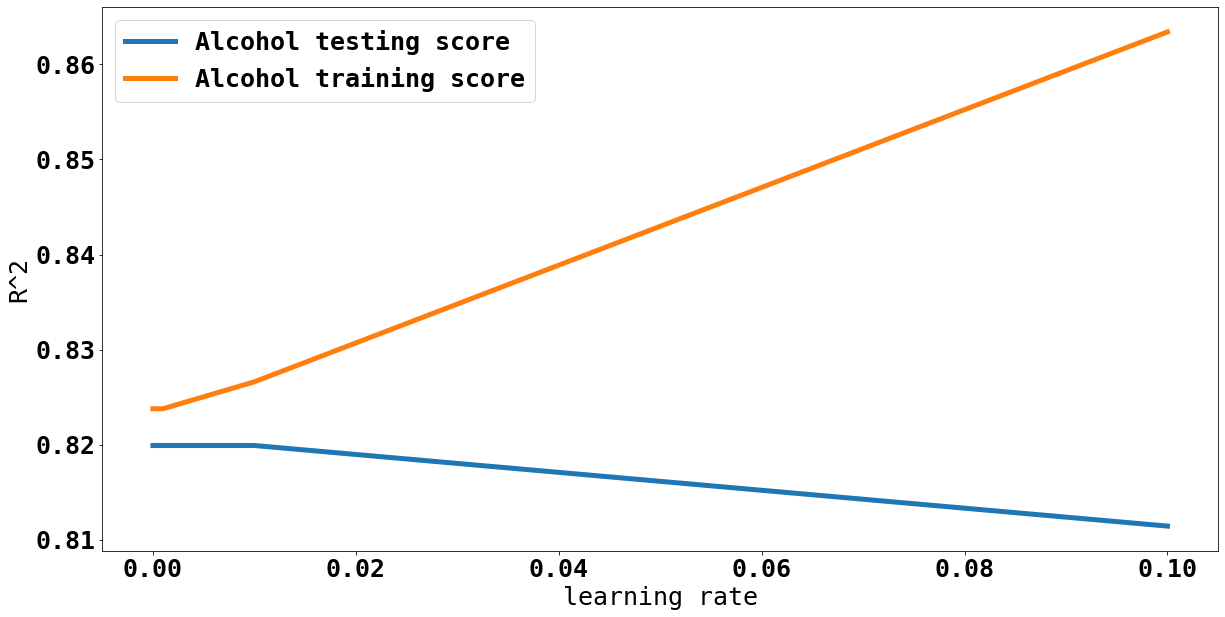

In [58]:
#plot score verse learning rate for Alcole used
plt.plot(learning_rate, alc_test_scores, label= 'Alcohol testing score' )
plt.plot(learning_rate, alc_train_scores, label= 'Alcohol training score' )
plt.ylabel('R^2')
plt.xlabel('learning rate')
plt.legend()
plt.show()

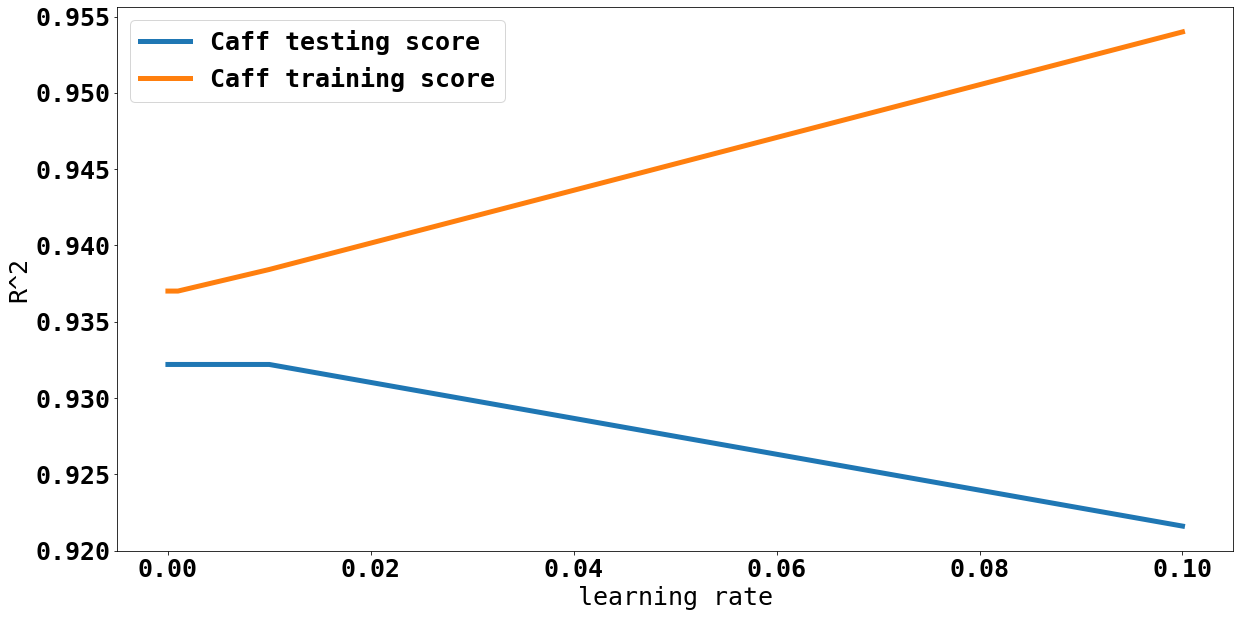

In [59]:
#plot score verse learning rate for Caff used
plt.plot(learning_rate, caf_test_scores, label= 'Caff testing score' )
plt.plot(learning_rate, caf_train_scores, label= 'Caff training score' )
plt.ylabel('R^2')
plt.xlabel('learning rate')
plt.legend()
plt.show()

# Note - Both case training and test score diverge as the learning rate increase, testing score decrease and training score increase as the learning rate increase and the usage is as indicated as above

Task3 -C

- Fit one multiclass classification model for all the rest 16 features. Comment on the accuracy of predicting each feature, for all the seven classes.

In [60]:
#data preparation
Al_Ca_rest_data = full_data_copy.iloc[:,6:-1]
Al_Ca_rest_data=Al_Ca_rest_data.drop(['Alcohol','Caff'],axis=1)
#Al_Ca_rest_data.info()

Catagorizing CL0 - class(1),...CL6-class(6)

In [61]:
#Catagorizing CL0 - class(1),...CL6-class(6)
for i in range (7, 23):
    Al_Ca_rest_data.iloc[:, i] = Al_Ca_rest_data.iloc[:, i].replace(['CL0'],0)
    Al_Ca_rest_data.iloc[:, i] = Al_Ca_rest_data.iloc[:, i].replace(['CL1'],1)
    Al_Ca_rest_data.iloc[:, i] = Al_Ca_rest_data.iloc[:, i].replace(['CL2'],2)
    Al_Ca_rest_data.iloc[:, i] = Al_Ca_rest_data.iloc[:, i].replace(['CL3'],3)
    Al_Ca_rest_data.iloc[:, i] = Al_Ca_rest_data.iloc[:, i].replace(['CL4'],4)
    Al_Ca_rest_data.iloc[:, i] = Al_Ca_rest_data.iloc[:, i].replace(['CL5'],5)
    Al_Ca_rest_data.iloc[:, i] = Al_Ca_rest_data.iloc[:, i].replace(['CL6'],6)
    
#Al_Ca_rest_data

In [62]:
#check
Al_Ca_rest_data.Amyl.unique()

array([0, 2, 1, 3, 5, 4, 6])

In [63]:
#labels for 16 features
y_amphet = Al_Ca_rest_data['Amphet'].values #multiclass (Amphet)
y_amyl = Al_Ca_rest_data['Amyl'].values#multiclass (Amyl)
y_benzos = Al_Ca_rest_data['Benzos'].values#multiclass (Benzos)
y_canabis = Al_Ca_rest_data['Canabis'].values#multiclass (Canabis)
y_choc = Al_Ca_rest_data['Choc'].values#multiclass (choc)
y_coke = Al_Ca_rest_data['Coke'].values#multiclass (Coke)
y_crack = Al_Ca_rest_data['Crack'].values#multiclass (Crack)
y_ecstasy = Al_Ca_rest_data['Ecstasy'].values#multiclass (Ecstasy)
y_heroin = Al_Ca_rest_data['Heroin'].values#multiclass (Heroin)
y_ketamin = Al_Ca_rest_data['Ketamin'].values#multiclass (Ketamin)
y_legalh = Al_Ca_rest_data['Legalh'].values#multiclass (Legalh)
y_lSD = Al_Ca_rest_data['LSD'].values#multiclass (LSD)
y_meth = Al_Ca_rest_data['Meth'].values#multiclass (Meth)
y_mushrooms = Al_Ca_rest_data['Mushrooms'].values#multiclass (Mushrooms)
y_nicotine = Al_Ca_rest_data['Nicotine'].values#multiclass (Nicotine)
y_semer = Al_Ca_rest_data['Semer'].values#multiclass (Semer)

In [64]:
#split train/test data
features_columns = ['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']
X= Al_Ca_rest_data.iloc[:,:7].values #features

X_train_amphet, X_test_amphet, y_train_amphet, y_test_amphet = train_test_split(X, y_amphet, random_state=42)
X_train_amyl, X_test_amyl, y_train_amyl, y_test_amyl = train_test_split(X, y_amyl, random_state=42)

X_train_benzos, X_test_benzos, y_train_benzos, y_test_benzos = train_test_split(X, y_benzos, random_state=42)
X_train_canabis, X_test_canabis, y_train_canabis, y_test_canabis = train_test_split(X, y_canabis, random_state=42)

X_train_choc, X_test_choc, y_train_choc, y_test_choc = train_test_split(X, y_choc, random_state=42)
X_train_coke, X_test_coke, y_train_coke, y_test_coke = train_test_split(X, y_coke, random_state=42)

X_train_crack, X_test_crack, y_train_crack, y_test_crack = train_test_split(X, y_crack, random_state=42)
X_train_ecstasy, X_test_ecstasy, y_train_ecstasy, y_test_ecstasy = train_test_split(X, y_ecstasy, random_state=42)


X_train_heroin, X_test_heroin, y_train_heroin, y_test_heroin = train_test_split(X, y_heroin, random_state=42)
X_train_ketamin, X_test_ketamin, y_train_ketamin, y_test_ketamin = train_test_split(X, y_ketamin, random_state=42)

X_train_legalh, X_test_legalh, y_train_legalh, y_test_legalh = train_test_split(X, y_legalh, random_state=42)
X_train_lSD, X_test_lSD, y_train_lSD, y_test_lSD = train_test_split(X, y_lSD, random_state=42)

X_train_meth, X_test_meth, y_train_meth, y_test_meth = train_test_split(X, y_meth, random_state=42)
X_train_mushrooms, X_test_mushrooms, y_train_mushrooms, y_test_mushrooms = train_test_split(X, y_mushrooms, random_state=42)

X_train_nicotine, X_test_nicotine, y_train_nicotine, y_test_nicotine = train_test_split(X, y_nicotine, random_state=42)
X_train_semer, X_test_semer, y_train_semer, y_test_semer = train_test_split(X, y_semer, random_state=42)

Using GaussianNB model

In [65]:
gnb_amphet = GaussianNB()
gnb_amphet.fit(X,y_amphet)

gnb_amyl=GaussianNB()
gnb_amyl.fit(X,y_amyl)

gnb_benzos = GaussianNB()
gnb_benzos.fit(X,y_benzos)

gnb_canabis=GaussianNB()
gnb_canabis.fit(X,y_canabis)

gnb_choc = GaussianNB()
gnb_choc.fit(X,y_choc)

gnb_coke=GaussianNB()
gnb_coke.fit(X,y_coke)

gnb_crack=GaussianNB()
gnb_crack.fit(X,y_crack)

gnb_ecstasy=GaussianNB()
gnb_ecstasy.fit(X,y_ecstasy)

gnb_heroin=GaussianNB()
gnb_heroin.fit(X,y_heroin)

gnb_ketamin=GaussianNB()
gnb_ketamin.fit(X,y_ketamin)

gnb_legalh=GaussianNB()
gnb_legalh.fit(X,y_legalh)

gnb_lSD=GaussianNB()
gnb_lSD.fit(X,y_lSD)

gnb_meth=GaussianNB()
gnb_meth.fit(X,y_meth)

gnb_mushrooms=GaussianNB()
gnb_mushrooms.fit(X,y_mushrooms)

gnb_nicotine=GaussianNB()
gnb_nicotine.fit(X,y_nicotine)

gnb_semer=GaussianNB()
gnb_semer.fit(X,y_semer)

GaussianNB(priors=None, var_smoothing=1e-09)

In [66]:
#prediction using GaussianNB
pre_amphet= gnb_amphet.predict(X_test_amphet)
pre_amyl= gnb_amyl.predict(X_test_amyl)
pre_benzos= gnb_benzos.predict(X_test_benzos)

pre_canabis= gnb_canabis.predict(X_test_canabis)
pre_choc= gnb_choc.predict(X_test_choc)
pre_coke= gnb_coke.predict(X_test_coke)

pre_crack= gnb_crack.predict(X_test_crack)
pre_ecstasy= gnb_ecstasy.predict(X_test_ecstasy)
pre_heroin= gnb_heroin.predict(X_test_heroin)

pre_ketamin= gnb_ketamin.predict(X_test_ketamin)
pre_legalh= gnb_amphet.predict(X_test_legalh)
pre_lSD= gnb_lSD.predict(X_test_lSD)

pre_meth= gnb_meth.predict(X_test_meth)
pre_mushrooms= gnb_mushrooms.predict(X_test_mushrooms)
pre_nicotine= gnb_nicotine.predict(X_test_nicotine)
pre_semer= gnb_semer.predict(X_test_semer)


# I will present the class  accuracy of prediction for amphet druge usage, and the rest can be done the same way

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.58      0.86      0.69       244
           1       0.00      0.00      0.00        64
           2       0.17      0.02      0.03        58
           3       0.22      0.38      0.28        52
           4       0.00      0.00      0.00        19
           5       0.00      0.00      0.00        15
           6       0.22      0.10      0.14        20

    accuracy                           0.49       472
   macro avg       0.17      0.19      0.16       472
weighted avg       0.35      0.49      0.40       472



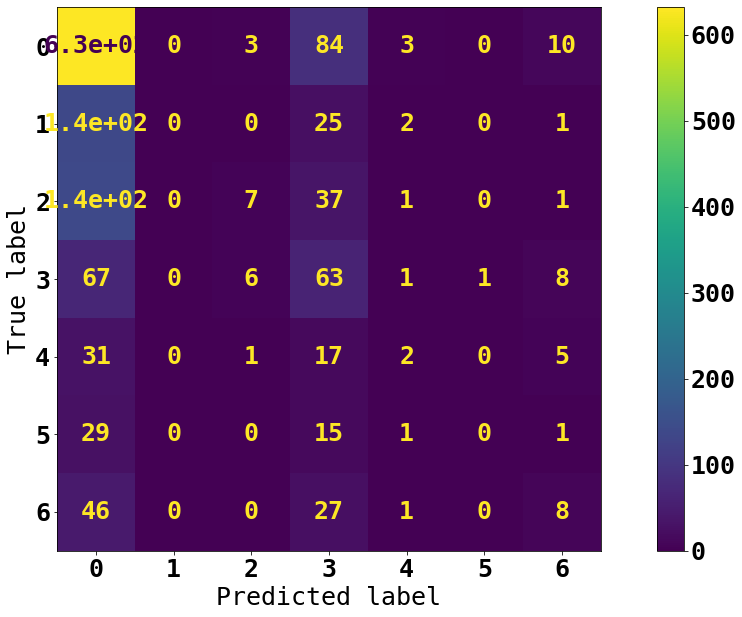

In [67]:
#classification report gives us accuracy of prediction for all the seven classes of given feture.
from sklearn.metrics import plot_confusion_matrix, classification_report
plot_confusion_matrix(gnb_amphet,X_train_amphet, y_train_amphet)
print(classification_report(y_test_amphet,pre_amphet))

Note-f1-score of class 0 higher means more person classified into class 0

# f1 score for CL0 Never Used class is higer

Task3-D 

- Run one binary classification model for 3 features out of 18. Test the performance of the model by choosing as:
one class (class 0) the variable "Used in Last Decade" and the remaining variables for the other class (class 1).
one class (class 0) the variables "Used in Last Decade" and "Used in Last Year" and the remaining variables for the other class (class 1).
one class (class 0) the variables "Used in Last Decade", "Used in Last Year", "Used in Last Month" and the remaining
variables for the other class (class 1).
Comment your results, and point which selection of classes have better accuracy.

Task1: one class (class 0) the variable "Used in Last Decade" and the remaining variables for the other class (class 1

In [68]:
#copy of data
#full_data_copy

In [69]:
#3 features out of 18 ('Heroin','Ecstasy', 'Meth')
column3=['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS','Heroin','Ecstasy', 'Meth']#variables name
data_18_data = full_data_copy.iloc[:,6:-1]
data_18_data =pd.DataFrame(data_18_data, columns= column3)
data_18 = data_18_data.copy()
#data_18

In [70]:
#Used in Last Decade (CL2) - class 0 ,the rest classified as used and assigined (class 1)
for i in range (7, 10):
    data_18.iloc[:, i] = data_18.iloc[:, i].replace(['CL0'],1)
    data_18.iloc[:, i] = data_18.iloc[:, i].replace(['CL1'],1)
    data_18.iloc[:, i] = data_18.iloc[:, i].replace(['CL2'],0)
    data_18.iloc[:, i] = data_18.iloc[:, i].replace(['CL3'],1)
    data_18.iloc[:, i] = data_18.iloc[:, i].replace(['CL4'],1)
    data_18.iloc[:, i] = data_18.iloc[:, i].replace(['CL5'],1)
    data_18.iloc[:, i] = data_18.iloc[:, i].replace(['CL6'],1)
    
#data_18

Using svc

In [71]:
#Heroin as target
features_columns = ['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']
X= data_18.iloc[:,:7].values #features
y_Heroin= data_18.iloc[:,7].values#target
y_Heroin

X_train_Heroin, X_test_Heroin, y_train_Heroin, y_test_Heroin = train_test_split(X, y_Heroin, random_state=42)
X_train_Heroin.shape

from sklearn.svm import SVC
svc_Heroin = SVC(kernel='linear')
svc_Heroin.fit(X_train_Heroin, y_train_Heroin)

print("Training set score: {:.5f}".format(svc_Heroin.score(X_train_Heroin, y_train_Heroin)))
print("Test set score: {:.5f}".format(svc_Heroin.score(X_test_Heroin, y_test_Heroin)))

Training set score: 0.94763
Test set score: 0.95763


In [72]:
#Ecstasy as target
features_columns = ['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']
X= data_18.iloc[:,:7].values #features
y_Ecstasy= data_18.iloc[:,8].values#target

X_train_Ecstasy, X_test_Ecstasy, y_train_Ecstasy, y_test_Ecstasy = train_test_split(X, y_Ecstasy, random_state=42)
X_train_Heroin.shape

from sklearn.svm import SVC
svc_Ecstasy = SVC(kernel='linear')
svc_Ecstasy.fit(X_train_Heroin, y_train_Heroin)

print("Training set score: {:.5f}".format(svc_Ecstasy.score(X_train_Ecstasy, y_train_Ecstasy)))
print("Test set score: {:.5f}".format(svc_Ecstasy.score(X_test_Ecstasy, y_test_Ecstasy)))

Training set score: 0.87686
Test set score: 0.87288


In [73]:
#Meth as target
X= data_18.iloc[:,:7].values #features
y_Meth= data_18.iloc[:,9].values#target

X_train_Meth, X_test_Meth, y_train_Meth, y_test_Meth = train_test_split(X, y_Meth, random_state=42)

from sklearn.svm import SVC
svc_Meth = SVC(kernel='linear')
svc_Meth.fit(X_train_Meth, y_train_Meth)

print("Training set score: {:.5f}".format(svc_Meth.score(X_train_Meth, y_train_Meth)))
print("Test set score: {:.5f}".format(svc_Meth.score(X_test_Meth, y_test_Meth)))

Training set score: 0.94834
Test set score: 0.94915


# Note- Heroin usage is higher , Metha follows

Task3- E 

- one class (class 0) the variables "Used in Last Decade" and "Used in Last Year" and the remaining variables for the other class (class 1)

In [74]:
#Used in Last Decade (CL2) and Used in Last Year (CL3)  - class 0 ,the rest classified as used and assigined (class 1)
column3=['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS','Heroin','Ecstasy', 'Meth']
data_18_T2 = full_data_copy.iloc[:,6:-1]
data_18_T2 =pd.DataFrame(data_18_T2, columns= column3)
#data_18_T2

In [75]:
for i in range (7, 10):
    data_18_T2.iloc[:, i] = data_18_T2.iloc[:, i].replace(['CL0'],1)
    data_18_T2.iloc[:, i] = data_18_T2.iloc[:, i].replace(['CL1'],1)
    data_18_T2.iloc[:, i] = data_18_T2.iloc[:, i].replace(['CL2'],0)
    data_18_T2.iloc[:, i] = data_18_T2.iloc[:, i].replace(['CL3'],0)
    data_18_T2.iloc[:, i] = data_18_T2.iloc[:, i].replace(['CL4'],1)
    data_18_T2.iloc[:, i] = data_18_T2.iloc[:, i].replace(['CL5'],1)
    data_18_T2.iloc[:, i] = data_18_T2.iloc[:, i].replace(['CL6'],1)
    
#data_18_T2

Using svc

In [76]:
#Heroin as target
X_2= data_18_T2.iloc[:,:7].values #features
y2_Heroin= data_18_T2.iloc[:,7].values#target
y2_Heroin

X2_train_Heroin, X2_test_Heroin, y2_train_Heroin, y2_test_Heroin = train_test_split(X_2, y2_Heroin, random_state=42)

from sklearn.svm import SVC
svc2_Heroin = SVC(kernel='linear')
svc2_Heroin.fit(X2_train_Heroin, y2_train_Heroin)

print("Training set score: {:.5f}".format(svc2_Heroin.score(X2_train_Heroin, y2_train_Heroin)))
print("Test set score: {:.5f}".format(svc2_Heroin.score(X2_test_Heroin, y2_test_Heroin)))

Training set score: 0.91507
Test set score: 0.91737


In [77]:
#Ecstasy as target
y2_Ecstasy= data_18_T2.iloc[:,8].values#target

X2_train_Ecstasy, X2_test_Ecstasy, y2_train_Ecstasy, y2_test_Ecstasy = train_test_split(X_2, y2_Ecstasy, random_state=42)

from sklearn.svm import SVC
svc2_Ecstasy = SVC(kernel='linear')
svc2_Ecstasy.fit(X2_train_Heroin, y2_train_Heroin)

print("Training set score: {:.5f}".format(svc2_Ecstasy.score(X2_train_Ecstasy, y2_train_Ecstasy)))
print("Test set score: {:.5f}".format(svc2_Ecstasy.score(X2_test_Ecstasy, y2_test_Ecstasy)))

Training set score: 0.73531
Test set score: 0.70975


In [78]:
#Meth as target
y2_Meth= data_18_T2.iloc[:,9].values#target
X2_train_Meth, X2_test_Meth, y2_train_Meth, y2_test_Meth = train_test_split(X_2, y2_Meth, random_state=42)
X_train_Heroin.shape

from sklearn.svm import SVC
svc2_Meth = SVC(kernel='linear')
svc2_Meth.fit(X2_train_Meth, y2_train_Meth)

print("Training set score: {:.5f}".format(svc2_Meth.score(X2_train_Meth, y2_train_Meth)))
print("Test set score: {:.5f}".format(svc2_Meth.score(X2_test_Meth, y2_test_Meth)))

Training set score: 0.87403
Test set score: 0.85593


# Note- Heroin usage is higher , Metha follows for SVC model again

Task3 F 

- one class (class 0) the variables "Used in Last Decade", "Used in Last Year", "Used in Last Month" and the remaining variables for the other class (class 1).

In [79]:
#Used in Last Decade (CL2), Used in Last Year (CL3) and Used in Last Month (CL4) - class 0 ,the rest classified as used and assigined (class 1)
data_18_T3 = data_18_T2.copy()
#data_18_T3

In [80]:
for i in range (7, 10):
    data_18_T3.iloc[:, i] = data_18_T3.iloc[:, i].replace(['CL0'],1)
    data_18_T3.iloc[:, i] = data_18_T3.iloc[:, i].replace(['CL1'],1)
    data_18_T3.iloc[:, i] = data_18_T3.iloc[:, i].replace(['CL2'],0)
    data_18_T3.iloc[:, i] = data_18_T3.iloc[:, i].replace(['CL3'],0)
    data_18_T3.iloc[:, i] = data_18_T3.iloc[:, i].replace(['CL4'],0)
    data_18_T3.iloc[:, i] = data_18_T3.iloc[:, i].replace(['CL5'],1)
    data_18_T3.iloc[:, i] = data_18_T3.iloc[:, i].replace(['CL6'],1)
    
#data_18_T3

In [81]:
#Heroin as target
X_3= data_18_T3.iloc[:,:7].values #features
y3_Heroin= data_18_T3.iloc[:,7].values#target
y3_Heroin

X3_train_Heroin, X3_test_Heroin, y3_train_Heroin, y3_test_Heroin = train_test_split(X_3, y3_Heroin, random_state=42)

from sklearn.svm import SVC
svc3_Heroin = SVC(kernel='linear')
svc3_Heroin.fit(X3_train_Heroin, y3_train_Heroin)

print("Training set score: {:.5f}".format(svc3_Heroin.score(X3_train_Heroin, y3_train_Heroin)))
print("Test set score: {:.5f}".format(svc3_Heroin.score(X3_test_Heroin, y3_test_Heroin)))

Training set score: 0.91507
Test set score: 0.91737


In [82]:
#Ecstasy as target
y3_Ecstasy= data_18_T3.iloc[:,8].values#target

X3_train_Ecstasy, X3_test_Ecstasy, y3_train_Ecstasy, y3_test_Ecstasy = train_test_split(X_3, y3_Ecstasy, random_state=42)

from sklearn.svm import SVC
svc3_Ecstasy = SVC(kernel='linear')
svc3_Ecstasy.fit(X3_train_Heroin, y3_train_Heroin)

print("Training set score: {:.5f}".format(svc3_Ecstasy.score(X3_train_Ecstasy, y3_train_Ecstasy)))
print("Test set score: {:.5f}".format(svc3_Ecstasy.score(X3_test_Ecstasy, y3_test_Ecstasy)))

Training set score: 0.73531
Test set score: 0.70975


In [83]:
#Meth as target
y3_Meth= data_18_T3.iloc[:,9].values#target
X3_train_Meth, X3_test_Meth, y3_train_Meth, y3_test_Meth = train_test_split(X_3, y3_Meth, random_state=42)

from sklearn.svm import SVC
svc3_Meth = SVC(kernel='linear')
svc3_Meth.fit(X3_train_Meth, y3_train_Meth)

print("Training set score: {:.5f}".format(svc3_Meth.score(X3_train_Meth, y3_train_Meth)))
print("Test set score: {:.5f}".format(svc3_Meth.score(X3_test_Meth, y3_test_Meth)))

Training set score: 0.87403
Test set score: 0.85593


# Note- Heroin usage is higher , Metha follows for SVC model again

# THANK YOU!!